In [21]:

# VA Traffic Accident Analysis 


# Load Virginia accident data
file_path = r"C:\Users\jacob\OneDrive\Documents\MSAAI Datasets\virginia_accidents.csv"
df_va = pd.read_csv(file_path)

# Show basic info
df_va.info()

# Show first few rows
print(df_va.head())

# Check for missing values
missing_values = df_va.isnull().sum()
print("Missing values per column:\n", missing_values)


df_sample = df_va.sample(n=10000, random_state=42)  # Adjust sample size if needed






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303301 entries, 0 to 303300
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     303301 non-null  object 
 1   Source                 303301 non-null  object 
 2   Severity               303301 non-null  int64  
 3   Start_Time             303301 non-null  object 
 4   End_Time               303301 non-null  object 
 5   Start_Lat              303301 non-null  float64
 6   Start_Lng              303301 non-null  float64
 7   End_Lat                205173 non-null  float64
 8   End_Lng                205173 non-null  float64
 9   Distance(mi)           303301 non-null  float64
 10  Description            303301 non-null  object 
 11  Street                 302870 non-null  object 
 12  City                   303301 non-null  object 
 13  County                 303301 non-null  object 
 14  State                  303301 non-nu

In [24]:
severity_counts = df_sample["Severity"].value_counts()
print("Accident Severity Distribution:\n", severity_counts)


import pandas as pd

# Convert 'Start_Time' to datetime format while handling errors
df_sample["Start_Time"] = pd.to_datetime(df_sample["Start_Time"], errors="coerce")

# Print how many timestamps were converted successfully and how many were set to NaT
print(df_sample["Start_Time"].isna().sum(), "invalid timestamps were removed.")

# Extract date components
df_sample["Hour"] = df_sample["Start_Time"].dt.hour
df_sample["Day"] = df_sample["Start_Time"].dt.dayofweek
df_sample["Month"] = df_sample["Start_Time"].dt.month

# Show sample of new columns
print(df_sample[["Start_Time", "Hour", "Day", "Month"]].head())




Accident Severity Distribution:
 Severity
2    7609
3    1675
4     631
1      85
Name: count, dtype: int64
1376 invalid timestamps were removed.
                Start_Time  Hour  Day  Month
77048  2018-07-19 10:10:55  10.0  3.0    7.0
59310  2019-03-05 18:12:28  18.0  1.0    3.0
219748                 NaT   NaN  NaN    NaN
171523 2022-04-19 07:57:14   7.0  1.0    4.0
56041  2019-05-15 19:17:07  19.0  2.0    5.0


Top 10 Weather Conditions During Accidents in Virginia:
 Weather_Condition
Fair                3389
Mostly Cloudy       1386
Cloudy              1195
Partly Cloudy        892
Clear                638
Light Rain           569
Overcast             400
Scattered Clouds     167
Rain                 143
Fog                  104
Name: count, dtype: int64


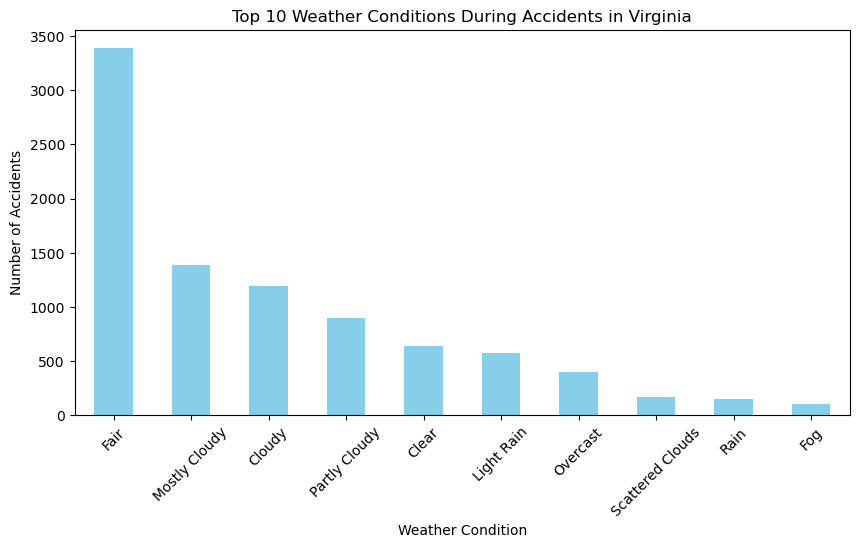

In [26]:
# Check the most common weather conditions during accidents
weather_counts = df_sample["Weather_Condition"].value_counts().head(10)

# Print the results
print("Top 10 Weather Conditions During Accidents in Virginia:\n", weather_counts)

import matplotlib.pyplot as plt

# Plot the top 10 weather conditions
weather_counts.plot(kind="bar", figsize=(10,5), color="skyblue")

# Add labels and title
plt.title("Top 10 Weather Conditions During Accidents in Virginia")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()



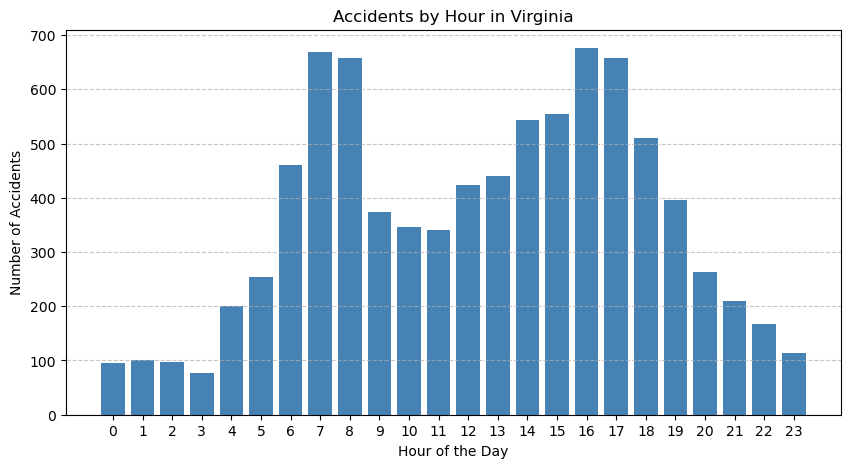

In [27]:
import matplotlib.pyplot as plt

# Count accidents per hour
hourly_counts = df_sample["Hour"].value_counts().sort_index()

# Plot accidents by hour
plt.figure(figsize=(10, 5))
plt.bar(hourly_counts.index, hourly_counts.values, color="steelblue")

# Add labels
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Hour in Virginia")
plt.xticks(range(0, 24))  # Show all 24 hours
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


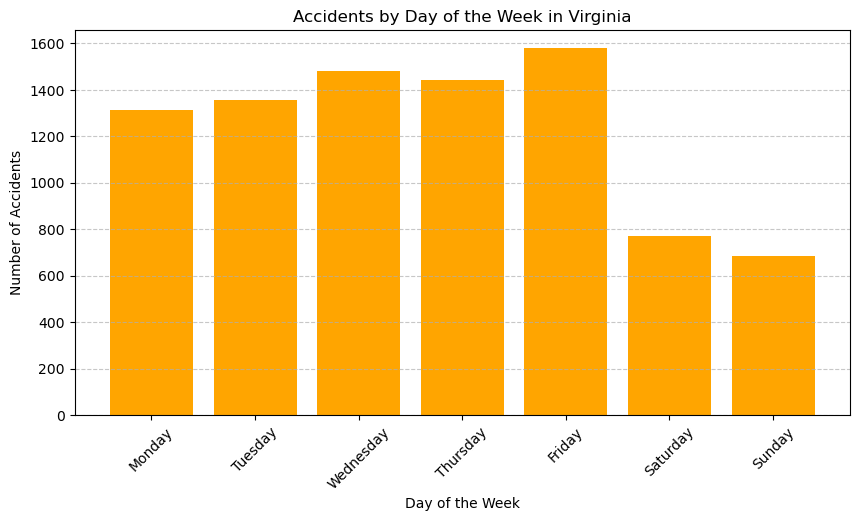

In [28]:
# Map weekday numbers to actual names
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Count accidents by day
day_counts = df_sample["Day"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(day_names, day_counts.values, color="orange")

# Add labels
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Day of the Week in Virginia")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


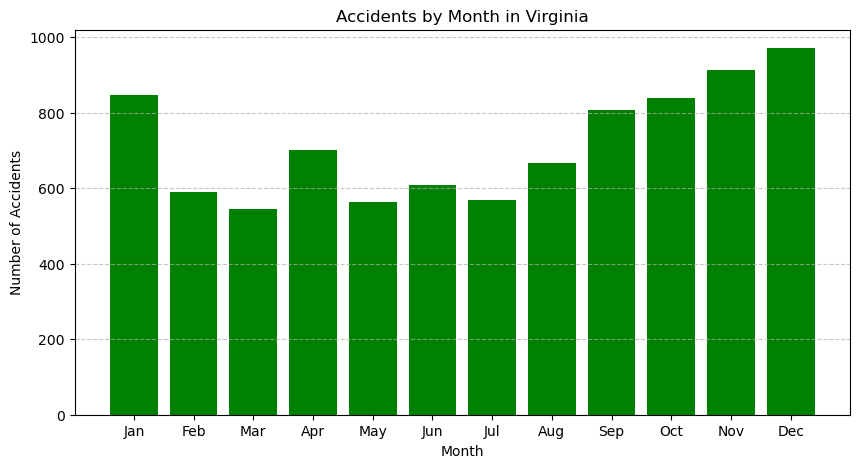

In [29]:
# Count accidents per month
month_counts = df_sample["Month"].value_counts().sort_index()

# Plot accidents by month
plt.figure(figsize=(10, 5))
plt.bar(month_counts.index, month_counts.values, color="green")

# Add labels
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Month in Virginia")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
